In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Info about the data**

In [84]:
#db = pd.read_csv('Final_Data.csv')
db = pd.read_csv('Final_Data_new.csv')
db.drop('Unnamed: 0', inplace=True, axis=1)

In [85]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99730 entries, 0 to 99729
Data columns (total 86 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer_id  99730 non-null  object 
 1   P_2_band     99730 non-null  float64
 2   P_3_band     99730 non-null  float64
 3   P_4_band     99730 non-null  float64
 4   S_3_band     99730 non-null  float64
 5   S_5_band     99730 non-null  float64
 6   S_7_band     99730 non-null  float64
 7   S_8_band     99730 non-null  float64
 8   S_15_band    99730 non-null  float64
 9   S_22_band    99730 non-null  float64
 10  S_24_band    99730 non-null  float64
 11  S_25_band    99730 non-null  float64
 12  S_27_band    99730 non-null  float64
 13  R_1_band     99730 non-null  float64
 14  R_3_band     99730 non-null  float64
 15  R_27_band    99730 non-null  float64
 16  B_1_band     99730 non-null  float64
 17  B_2_band     99730 non-null  float64
 18  B_3_band     99730 non-null  float64
 19  B_4_

In [86]:
db.describe()

,P_2_band,P_3_band,P_4_band,S_3_band,S_5_band,S_7_band,S_8_band,S_15_band,S_22_band,S_24_band,...,D_60_band,D_61_band,D_62_band,D_70_band,D_71_band,D_74_band,D_75_band,D_77_band,D_64_band,target
count,99730.000000,99730.000000,99730.000000,99730.000000,99730.000000,99730.000000,99730.000000,99730.000000,99730.000000,99730.000000,...,99730.000000,99730.000000,99730.000000,99730.000000,99730.000000,99730.000000,99730.000000,99730.000000,99730.000000,99730.000000
mean,0.161221,-0.082069,-0.031744,-0.208978,-0.047986,-0.199707,-0.079232,-0.043606,-0.129025,-0.102588,...,-0.108760,0.033812,-0.393110,-0.086680,-0.038850,-0.305923,0.095470,-0.351961,-0.051555,0.246215
std,0.120139,0.583212,0.361715,0.930970,0.434158,0.906683,0.560597,0.412888,0.734381,0.643503,...,0.653983,0.028769,1.296554,0.608573,0.391368,1.128835,0.076528,1.216295,0.452217,0.430807
min,0.000013,-0.648752,-0.249243,-1.379322,-0.560612,-1.340757,-0.964787,-0.738210,-1.026459,-1.019455,...,-0.881089,0.000036,-2.249836,-0.502247,-0.643371,-1.615188,0.000538,-2.474885,-0.472721,0.000000
25%,0.083816,-0.351891,-0.249243,-1.018410,-0.397385,-1.018410,-0.964787,-0.036543,-0.742354,-0.749229,...,-0.625420,0.010358,-0.975950,-0.468284,-0.643371,-1.615188,0.021790,-1.866227,-0.472721,0.000000
50%,0.149626,-0.339857,-0.226492,-0.305623,-0.397385,-0.287716,0.136282,0.209675,-0.503002,-0.247567,...,0.428996,0.028417,-0.819065,-0.468284,0.021476,0.157175,0.086468,0.441005,-0.472721,0.000000
75%,0.216774,0.801077,-0.226492,0.397125,0.356488,0.416050,0.136282,0.337459,0.170935,0.126586,...,0.638791,0.041802,0.486268,0.739414,0.430839,1.286179,0.131919,0.441005,0.444301,0.000000
max,0.443136,0.858900,0.594641,1.180612,0.408102,1.128421,0.587040,0.337459,1.082037,0.774650,...,0.638791,0.109599,1.394394,0.955359,0.430839,1.286179,0.266643,0.995035,0.718275,1.000000


### The dataset contains 99730 samples with 86 columns. 2 of these columns, 'Customer_id' and 'target', are of type 'object' and 'int64' respectively. All the rest 84 columns are of type 'float64'. All these 84 columns are the features to be used for training. The 'target' column contains the respective labels for each sample.

# **Preprocessing**

### Separating the features and labels and removing the column 'Customer_id'.

In [87]:
Y = np.ravel(db.iloc[:,-1])
X = db.drop(['Customer_id','target'], axis=1)

In [88]:
print(X.shape)
print(Y.shape)

(99730, 84)
(99730,)


### Since the mean and standard deviation of the data in each column is non-zero, we need to standardize it for optimal use by the SVM.

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [90]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [91]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(79784, 84)
(19946, 84)
(79784,)
(19946,)


# **Support Vector Machine (SVM)**

### The sklearn.svm.SVC class implemented by the SciKit learn library is impractical for use with large datasets (number of samples greater than few tens of thousands). This is because the fit time scales quadratically with number of samples. Thus we would be using SGDClassifier() with Nystroem() kernel approximation to work with different kernels.

In [92]:
from sklearn.metrics import hinge_loss, accuracy_score, recall_score, precision_score, RocCurveDisplay
from sklearn.metrics import auc, f1_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve

In [93]:
from sklearn.kernel_approximation import Nystroem

## Linear kernel

In [94]:
from sklearn.linear_model import SGDClassifier

linear_svm_1 = SGDClassifier(loss='hinge', n_jobs=-1)

In [95]:
linear_svm_1.fit(x_train, y_train)

SGDClassifier(n_jobs=-1)

In [96]:
y_test_pred = linear_svm_1.predict(x_test)
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred, average=None)
precision = precision_score(y_test, y_test_pred, average=None)
f1 = f1_score(y_test, y_test_pred, average=None)
print("Linear Kernel SVM")
print("Accuracy :",accuracy)
print("Recall :",recall)
print("Precision :",precision)
print("F1 :",f1)

Linear Kernel SVM
Accuracy : 0.8579665095758549
Recall : [0.91631272 0.67773678]
Precision : [0.89778269 0.72388877]
F1 : [0.90695307 0.70005294]


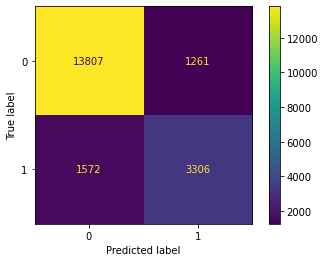

In [97]:
conf_mat = confusion_matrix(y_test, y_test_pred, labels=linear_svm_1.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=linear_svm_1.classes_)
display.plot()
plt.show()

In [98]:
decision_function = linear_svm_1.decision_function(x_test)
precision_list, recall_list, threshold_list = precision_recall_curve(y_test, decision_function)

Text(0.5, 1.0, 'Precision-Recall-Threshold Curve')

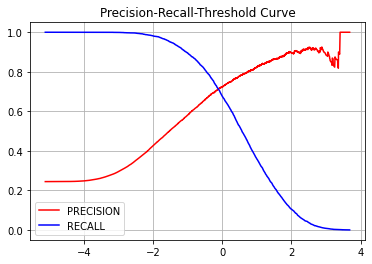

In [99]:
plt.plot(threshold_list, precision_list[:-1], c ='r', label ='PRECISION')
plt.plot(threshold_list, recall_list[:-1], c ='b', label ='RECALL')
plt.grid()
plt.legend()
plt.title('Precision-Recall-Threshold Curve')

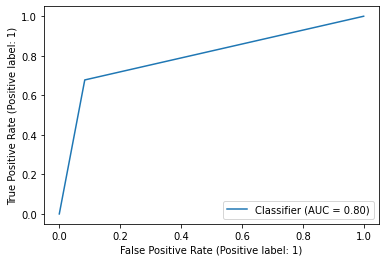

In [100]:
RocCurveDisplay.from_predictions(y_test, y_test_pred)
plt.show()

## Polynomial kernel


### Since the SVC class would take impractically large time to solve this problem, we would use Kernel approximations to approximate the feature mappings corresponding to certain kernels. The major advantage to this approach is that it takes very less time to train large datasets(such as ours) in comparison to the kernel trick often used in SVM. The approximation technique we would use is the Nystroem class. It computes low rank approximations of the kernel on a sample of the training data. This transformed data i.e. approximated feature mappings are the passed to SGDClassifier object for learning.

### Degree=2

In [101]:
from sklearn.linear_model import SGDClassifier

poly_svm_1 = SGDClassifier(loss='hinge', n_jobs=-1)

In [102]:
poly_kernel_trans = Nystroem(kernel='poly', gamma=0.1, degree=2, n_components=84, n_jobs=-1)
x_train_transformed = poly_kernel_trans.fit_transform(x_train)

In [103]:
poly_svm_1.fit(x_train_transformed, y_train)

SGDClassifier(n_jobs=-1)

In [104]:
y_test_pred = poly_svm_1.predict(x_test)
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred, average=None)
precision = precision_score(y_test, y_test_pred, average=None)
f1 = f1_score(y_test, y_test_pred, average=None)
print("Polynomial Kernel SVM with degree=2")
print("Accuracy :",accuracy)
print("Recall :",recall)
print("Precision :",precision)
print("F1 :",f1)

Polynomial Kernel SVM with degree=2
Accuracy : 0.7737892309234934
Recall : [0.92049376 0.32062321]
Precision : [0.80714618 0.56625634]
F1 : [0.8601017  0.40942408]


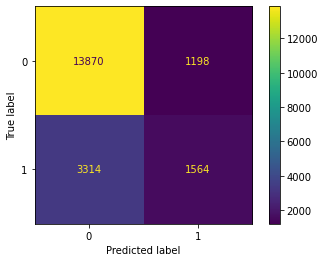

In [105]:
conf_mat = confusion_matrix(y_test, y_test_pred, labels=poly_svm_1.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=poly_svm_1.classes_)
display.plot()
plt.show()

In [106]:
decision_function = poly_svm_1.decision_function(x_test)
precision_list, recall_list, threshold_list = precision_recall_curve(y_test, decision_function)

Text(0.5, 1.0, 'Precision-Recall-Threshold Curve')

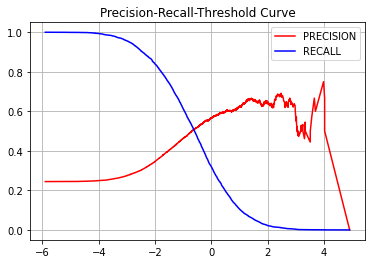

In [107]:
plt.plot(threshold_list, precision_list[:-1], c ='r', label ='PRECISION')
plt.plot(threshold_list, recall_list[:-1], c ='b', label ='RECALL')
plt.grid()
plt.legend()
plt.title('Precision-Recall-Threshold Curve')

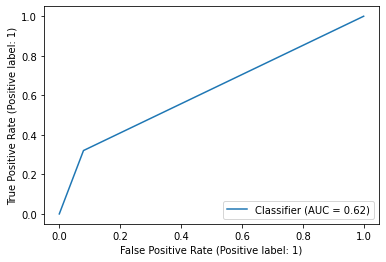

In [108]:
RocCurveDisplay.from_predictions(y_test, y_test_pred)
plt.show()

### Degree=3

In [109]:
from sklearn.linear_model import SGDClassifier

poly_svm_2 = SGDClassifier(loss='hinge', n_jobs=-1)

In [110]:
poly_kernel_trans = Nystroem(kernel='poly', gamma=0.1, degree=3, n_components=84, n_jobs=-1)
x_train_transformed = poly_kernel_trans.fit_transform(x_train)

In [111]:
poly_svm_2.fit(x_train_transformed, y_train)

SGDClassifier(n_jobs=-1)

In [112]:
y_test_pred = poly_svm_2.predict(x_test)
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred, average=None)
precision = precision_score(y_test, y_test_pred, average=None)
f1 = f1_score(y_test, y_test_pred, average=None)
print("Polynomial Kernel SVM with degree=3")
print("Accuracy :",accuracy)
print("Recall :",recall)
print("Precision :",precision)
print("F1 :",f1)

Polynomial Kernel SVM with degree=3
Accuracy : 0.744710718941141
Recall : [0.94763738 0.11787618]
Precision : [0.76843182 0.42155425]
F1 : [0.84867756 0.18423582]


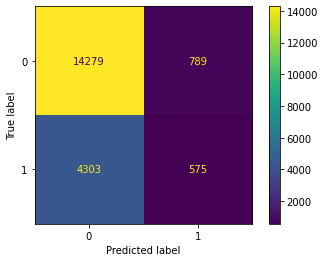

In [113]:
conf_mat = confusion_matrix(y_test, y_test_pred, labels=poly_svm_2.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=poly_svm_2.classes_)
display.plot()
plt.show()

In [114]:
decision_function = poly_svm_2.decision_function(x_test)
precision_list, recall_list, threshold_list = precision_recall_curve(y_test, decision_function)

Text(0.5, 1.0, 'Precision-Recall-Threshold Curve')

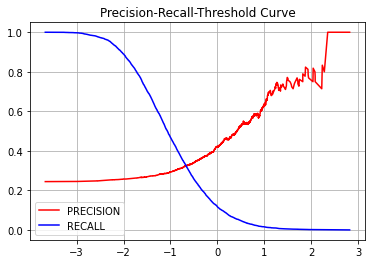

In [115]:
plt.plot(threshold_list, precision_list[:-1], c ='r', label ='PRECISION')
plt.plot(threshold_list, recall_list[:-1], c ='b', label ='RECALL')
plt.grid()
plt.legend()
plt.title('Precision-Recall-Threshold Curve')

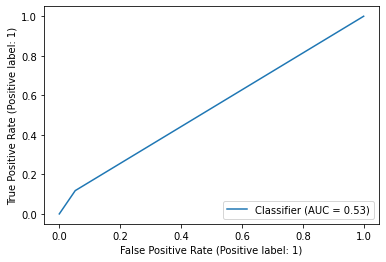

In [116]:
RocCurveDisplay.from_predictions(y_test, y_test_pred)
plt.show()

### Degree=4

In [117]:
from sklearn.linear_model import SGDClassifier

poly_svm_3 = SGDClassifier(loss='hinge', n_jobs=-1)

In [118]:
poly_kernel_trans = Nystroem(kernel='poly', gamma=0.1, degree=4, n_components=84, n_jobs=-1)
x_train_transformed = poly_kernel_trans.fit_transform(x_train)

In [119]:
poly_svm_3.fit(x_train_transformed, y_train)

SGDClassifier(n_jobs=-1)

In [120]:
y_test_pred = poly_svm_3.predict(x_test)
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred, average=None)
precision = precision_score(y_test, y_test_pred, average=None, zero_division="warn")
f1 = f1_score(y_test, y_test_pred, average=None)
print("Polynomial Kernel SVM with degree=4")
print("Accuracy :",accuracy)
print("Recall :",recall)
print("Precision :",precision)
print("F1 :",f1)

Polynomial Kernel SVM with degree=4
Accuracy : 0.7599017346836459
Recall : [0.97876294 0.08384584]
Precision : [0.76744549 0.56104252]
F1 : [0.86031792 0.14588907]


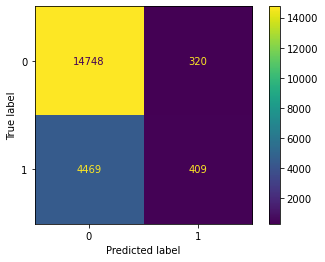

In [121]:
conf_mat = confusion_matrix(y_test, y_test_pred, labels=poly_svm_3.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=poly_svm_3.classes_)
display.plot()
plt.show()

In [122]:
decision_function = poly_svm_3.decision_function(x_test)
precision_list, recall_list, threshold_list = precision_recall_curve(y_test, decision_function)

Text(0.5, 1.0, 'Precision-Recall-Threshold Curve')

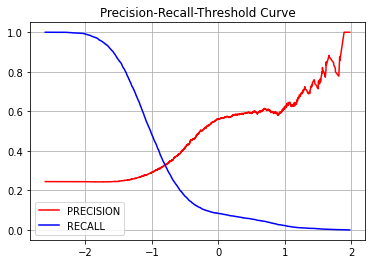

In [123]:
plt.plot(threshold_list, precision_list[:-1], c ='r', label ='PRECISION')
plt.plot(threshold_list, recall_list[:-1], c ='b', label ='RECALL')
plt.grid()
plt.legend()
plt.title('Precision-Recall-Threshold Curve')

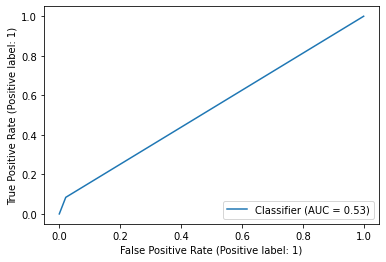

In [124]:
RocCurveDisplay.from_predictions(y_test, y_test_pred)
plt.show()

### Degree=5

In [125]:
from sklearn.linear_model import SGDClassifier

poly_svm_4 = SGDClassifier(loss='hinge', n_jobs=-1)

In [126]:
poly_kernel_trans = Nystroem(kernel='poly', gamma=0.1, degree=5, n_components=84, n_jobs=-1)
x_train_transformed = poly_kernel_trans.fit_transform(x_train)

In [127]:
poly_svm_4.fit(x_train_transformed, y_train)

SGDClassifier(n_jobs=-1)

In [128]:
y_test_pred = poly_svm_4.predict(x_test)
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred, average=None)
precision = precision_score(y_test, y_test_pred, average=None, zero_division="warn")
f1 = f1_score(y_test, y_test_pred, average=None)
print("Polynomial Kernel SVM with degree=5")
print("Accuracy :",accuracy)
print("Recall :",recall)
print("Precision :",precision)
print("F1 :",f1)

Polynomial Kernel SVM with degree=5
Accuracy : 0.40253684949363283
Recall : [0.50517653 0.08548585]
Precision : [0.63049781 0.05296583]
F1 : [0.56092259 0.06540663]


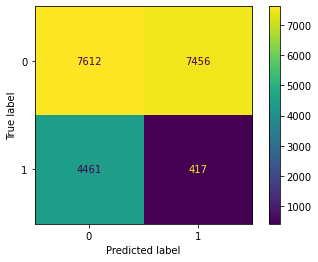

In [129]:
conf_mat = confusion_matrix(y_test, y_test_pred, labels=poly_svm_4.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=poly_svm_4.classes_)
display.plot()
plt.show()

In [130]:
decision_function = poly_svm_4.decision_function(x_test)
precision_list, recall_list, threshold_list = precision_recall_curve(y_test, decision_function)

Text(0.5, 1.0, 'Precision-Recall-Threshold Curve')

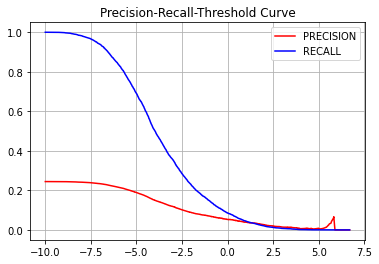

In [131]:
plt.plot(threshold_list, precision_list[:-1], c ='r', label ='PRECISION')
plt.plot(threshold_list, recall_list[:-1], c ='b', label ='RECALL')
plt.grid()
plt.legend()
plt.title('Precision-Recall-Threshold Curve')

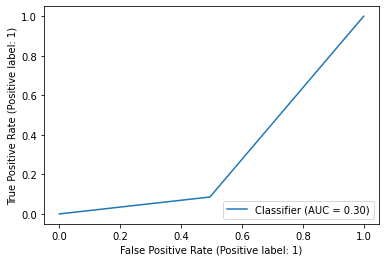

In [132]:
RocCurveDisplay.from_predictions(y_test, y_test_pred)
plt.show()

## Radial Basis Function Kernel

### gamma=0.001

In [133]:
from sklearn.linear_model import SGDClassifier

rbf_svm_1 = SGDClassifier(loss='hinge', n_jobs=-1)

In [134]:
rbf_kernel_trans = Nystroem(kernel='rbf', gamma=0.001, n_components=84, n_jobs=-1)
x_train_transformed = rbf_kernel_trans.fit_transform(x_train)

In [135]:
rbf_svm_1.fit(x_train_transformed, y_train)

SGDClassifier(n_jobs=-1)

In [136]:
y_test_pred = rbf_svm_1.predict(x_test)
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred, average=None)
precision = precision_score(y_test, y_test_pred, average=None, zero_division="warn")
f1 = f1_score(y_test, y_test_pred, average=None)
print("RBF Kernel SVM with gamma=0.001")
print("Accuracy :",accuracy)
print("Recall :",recall)
print("Precision :",precision)
print("F1 :",f1)

RBF Kernel SVM with gamma=0.001
Accuracy : 0.38940138373608746
Recall : [0.39978763 0.35731857]
Precision : [0.65771372 0.16158339]
F1 : [0.4972964  0.22253431]


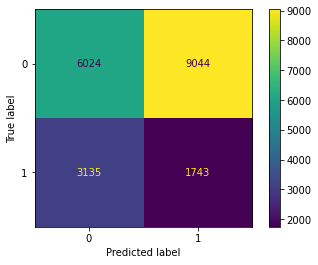

In [137]:
conf_mat = confusion_matrix(y_test, y_test_pred, labels=rbf_svm_1.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=rbf_svm_1.classes_)
display.plot()
plt.show()

In [138]:
decision_function = rbf_svm_1.decision_function(x_test)
precision_list, recall_list, threshold_list = precision_recall_curve(y_test, decision_function)

Text(0.5, 1.0, 'Precision-Recall-Threshold Curve')

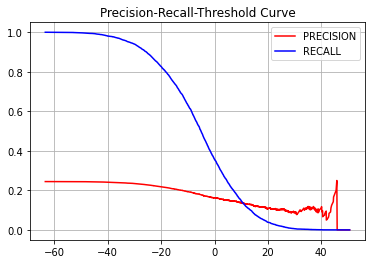

In [139]:
plt.plot(threshold_list, precision_list[:-1], c ='r', label ='PRECISION')
plt.plot(threshold_list, recall_list[:-1], c ='b', label ='RECALL')
plt.grid()
plt.legend()
plt.title('Precision-Recall-Threshold Curve')

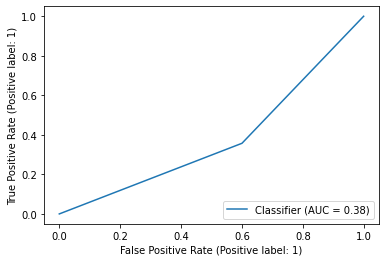

In [140]:
RocCurveDisplay.from_predictions(y_test, y_test_pred)
plt.show()

### gamma=0.01

In [141]:
from sklearn.linear_model import SGDClassifier

rbf_svm_2 = SGDClassifier(loss='hinge', n_jobs=-1)

In [142]:
rbf_kernel_trans = Nystroem(kernel='rbf', gamma=0.01, n_components=84, n_jobs=-1)
x_train_transformed = rbf_kernel_trans.fit_transform(x_train)

In [143]:
rbf_svm_2.fit(x_train_transformed, y_train)

SGDClassifier(n_jobs=-1)

In [144]:
y_test_pred = rbf_svm_2.predict(x_test)
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred, average=None)
precision = precision_score(y_test, y_test_pred, average=None, zero_division="warn")
f1 = f1_score(y_test, y_test_pred, average=None)
print("RBF Kernel SVM with gamma=0.01")
print("Accuracy :",accuracy)
print("Recall :",recall)
print("Precision :",precision)
print("F1 :",f1)

RBF Kernel SVM with gamma=0.01
Accuracy : 0.2746916675022561
Recall : [0.29725246 0.20500205]
Precision : [0.53595788 0.08628872]
F1 : [0.38241195 0.12145503]


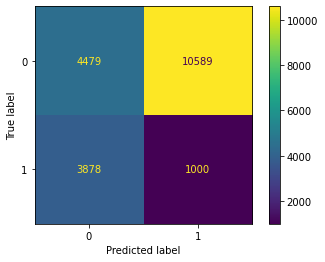

In [145]:
conf_mat = confusion_matrix(y_test, y_test_pred, labels=rbf_svm_2.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=rbf_svm_2.classes_)
display.plot()
plt.show()

In [146]:
decision_function = rbf_svm_2.decision_function(x_test)
precision_list, recall_list, threshold_list = precision_recall_curve(y_test, decision_function)

Text(0.5, 1.0, 'Precision-Recall-Threshold Curve')

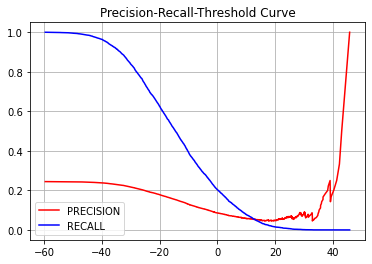

In [147]:
plt.plot(threshold_list, precision_list[:-1], c ='r', label ='PRECISION')
plt.plot(threshold_list, recall_list[:-1], c ='b', label ='RECALL')
plt.grid()
plt.legend()
plt.title('Precision-Recall-Threshold Curve')

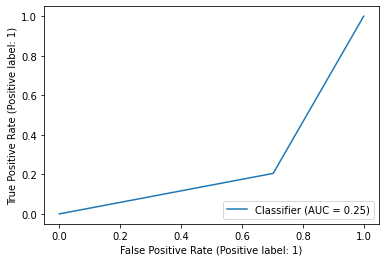

In [148]:
RocCurveDisplay.from_predictions(y_test, y_test_pred)
plt.show()

### gamma=0.1

In [149]:
from sklearn.linear_model import SGDClassifier

rbf_svm_3 = SGDClassifier(loss='hinge', n_jobs=-1)

In [150]:
rbf_kernel_trans = Nystroem(kernel='rbf', gamma=0.1, n_components=84, n_jobs=-1)
x_train_transformed = rbf_kernel_trans.fit_transform(x_train)

In [151]:
rbf_svm_3.fit(x_train_transformed, y_train)

SGDClassifier(n_jobs=-1)

In [152]:
y_test_pred = rbf_svm_3.predict(x_test)
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred, average=None)
precision = precision_score(y_test, y_test_pred, average=None, zero_division="warn")
f1 = f1_score(y_test, y_test_pred, average=None)
print("RBF Kernel SVM with gamma=0.1")
print("Accuracy :",accuracy)
print("Recall :",recall)
print("Precision :",precision)
print("F1 :",f1)

RBF Kernel SVM with gamma=0.1
Accuracy : 0.3370099268023664
Recall : [0.41624635 0.09225092]
Precision : [0.58616822 0.0486697 ]
F1 : [0.48680534 0.06372133]


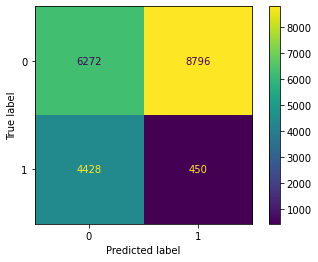

In [153]:
conf_mat = confusion_matrix(y_test, y_test_pred, labels=rbf_svm_3.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=rbf_svm_3.classes_)
display.plot()
plt.show()

In [154]:
decision_function = rbf_svm_3.decision_function(x_test)
precision_list, recall_list, threshold_list = precision_recall_curve(y_test, decision_function)

Text(0.5, 1.0, 'Precision-Recall-Threshold Curve')

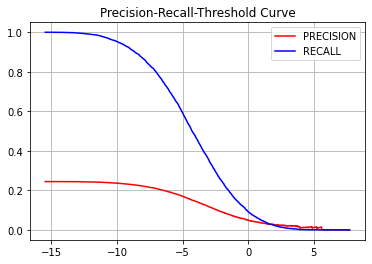

In [155]:
plt.plot(threshold_list, precision_list[:-1], c ='r', label ='PRECISION')
plt.plot(threshold_list, recall_list[:-1], c ='b', label ='RECALL')
plt.grid()
plt.legend()
plt.title('Precision-Recall-Threshold Curve')

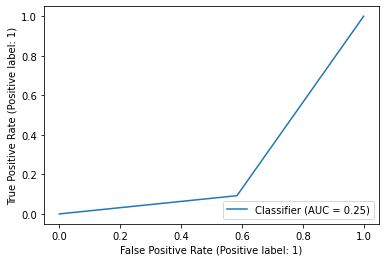

In [156]:
RocCurveDisplay.from_predictions(y_test, y_test_pred)
plt.show()

## Sigmoid Kernel

In [157]:
from sklearn.linear_model import SGDClassifier

sig_svm_1 = SGDClassifier(loss='hinge', n_jobs=-1)

In [158]:
sig_kernel_trans = Nystroem(kernel='sigmoid', n_components=84, n_jobs=-1)
x_train_transformed = sig_kernel_trans.fit_transform(x_train)

In [159]:
sig_svm_1.fit(x_train_transformed, y_train)

SGDClassifier(n_jobs=-1)

In [160]:
y_test_pred = sig_svm_1.predict(x_test)
accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred, average=None)
precision = precision_score(y_test, y_test_pred, average=None, zero_division="warn")
f1 = f1_score(y_test, y_test_pred, average=None)
print("Sigmoid Kernel SVM")
print("Accuracy :",accuracy)
print("Recall :",recall)
print("Precision :",precision)
print("F1 :",f1)

Sigmoid Kernel SVM
Accuracy : 0.39075503860423144
Recall : [0.44969472 0.20869209]
Precision : [0.63708161 0.10934479]
F1 : [0.52723312 0.14350155]


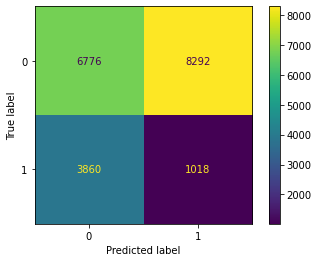

In [161]:
conf_mat = confusion_matrix(y_test, y_test_pred, labels=sig_svm_1.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=sig_svm_1.classes_)
display.plot()
plt.show()

In [162]:
decision_function = sig_svm_1.decision_function(x_test)
precision_list, recall_list, threshold_list = precision_recall_curve(y_test, decision_function)

Text(0.5, 1.0, 'Precision-Recall-Threshold Curve')

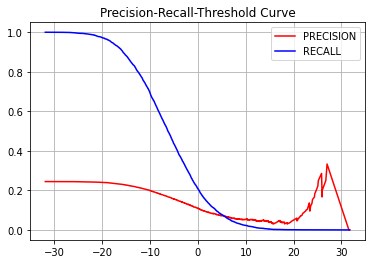

In [163]:
plt.plot(threshold_list, precision_list[:-1], c ='r', label ='PRECISION')
plt.plot(threshold_list, recall_list[:-1], c ='b', label ='RECALL')
plt.grid()
plt.legend()
plt.title('Precision-Recall-Threshold Curve')

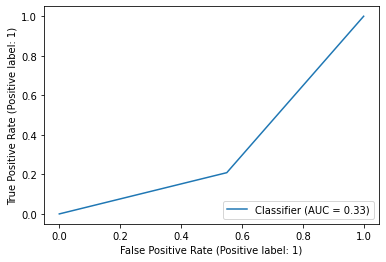

In [164]:
RocCurveDisplay.from_predictions(y_test, y_test_pred)
plt.show()